<a href="https://colab.research.google.com/github/beamscource/colab_notebooks/blob/main/algorithms_data_structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is a summary of the following resources:

https://www.amazon.de/Grokking-Algorithms-Aditya-Y-Bhargava/dp/1617292230

Find code here: https://github.com/egonschiele/grokking_algorithms

https://www.coursera.org/learn/algorithmic-toolbox

https://www.coursera.org/learn/data-structures

Some bits are from https://learning.edx.org/course/course-v1:MITx+6.00.1x_9+2T2016/home

https://www.amazon.de/Introduction-Computation-Programming-Using-Python

https://www.amazon.de/Think-Like-Programmer-Introduction-Creative

Find more on the topic in the MIT YT Playlist https://www.youtube.com/watch?v=HtSuA80QTyo&list=PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb

http://courses.csail.mit.edu/6.006/fall11/notes.shtml



# Introduction


Suppose that you're writing a computer program. There are a lot of tasks that you might want to perform that you don't really need to think about very hard. 

These are things like displaying a given text on the screen, or copying a file from one location to another, or searching a file for a given word.

Each of these algorithms has essentially a linear scan. You go through every word in the file, one at a time and you do the appropriate thing.

On the other hand, there are some other problems, where it's not so clear what it is you need to do. For example, you might be given a map and need to find the shortest path between two locations on this map.

Now, for these problems it's a lot more complicated, it's not immediately clear how to solve these problems. And even when you do come up with solutions, often the simple solutions to these problems are going to be far too slow.

And then even once you have a reasonably efficient algorithm for these problems, there's often a lot of room for further optimization. Improve things so that things run in an hour rather than a day. Or a minute rather than an hour. And all of these improvements will have a large effect on how useful this program you've written is.

Rouighly speaking, there are iterative and recursive algorithms, so let's describe both concepts first.

**Iteration**

Is a building block for being able to formulate complex algorithms by allowing to re-use specific pieces of a program. We want to be able to re-use code when performing the same operation *iteratively* on several elements of a list. Iteration is implemented as *while* or for-loops in most modern programming languages.

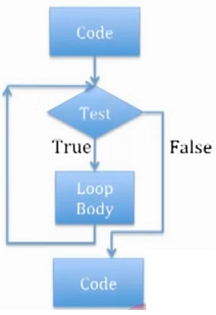

In [ ]:
# iteration
def countdown(i):
  for e in range(i, 0, -1):
    print(e)

countdown(5)

**Recursion**

We reduce a problem (e.g., an input list to an algorithm) to a simpler one, and keep applying the same function to each of the list elements. For recursion, we employ the *divide-and-conquer* strategy (solve a harder problem by breaking it into smaller pieces).

To understand how recusion works, it's important to know about the ideas of a call stack, local variables, and execution state.

When you call a function from another function, the calling function is paused in a partially completed state. All the values of the variables for that function are still stored in memory. The call stack is filled up as the recusive function goes down the list of items.

Once the base case is reached, all function return one by one working up the call stack. Here is an example of how to calculate the *factorial(n)* function.

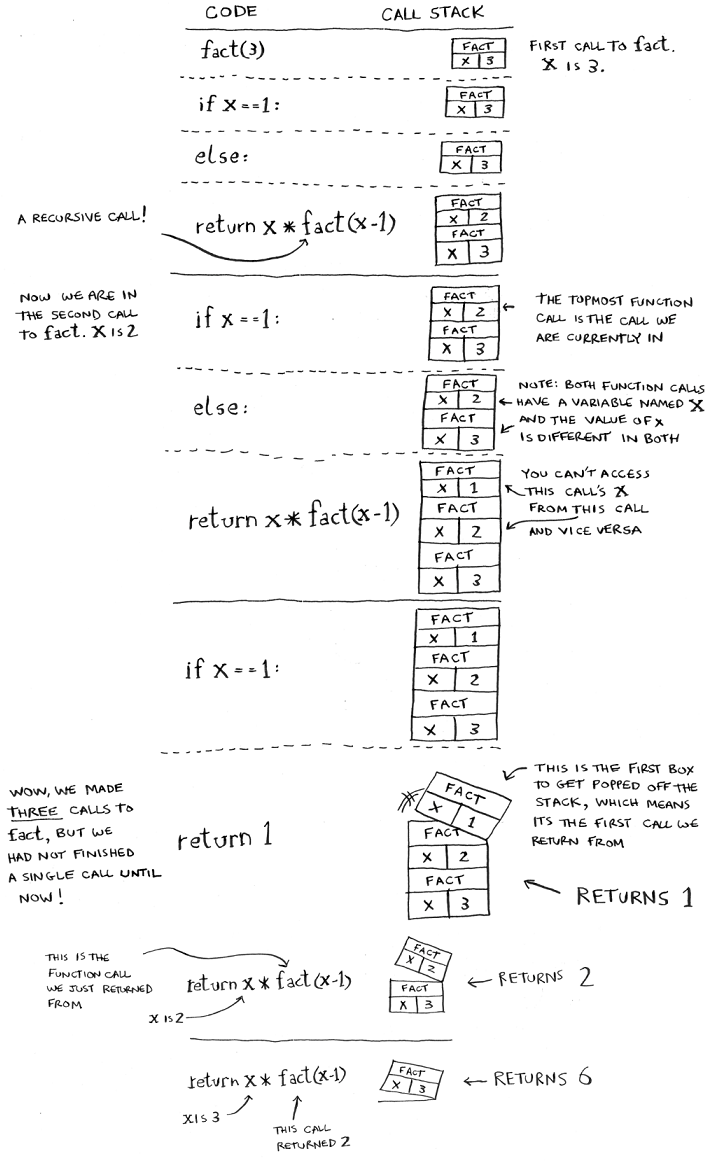

In [ ]:
# recursion
def countdown(i):
  # base case
  if i <= 0:
    return 0
  # recursive case/step
  else:
    print(i)
    return countdown(i-1)

countdown(5)

In [ ]:
def recSum(a):
  if len(a) == 0:
    return 0
  else:
    return a[0] + recSum(a[1:])

a = [4, 18, 35]
recSum(a)

In [ ]:
def fib(n):
  """Assumes n is an int >= 0
  Returns Fibonacci of n"""
  
  if n == 0 or n == 1:
    return 1
  else:
    return fib(n-1) + fib(n-2)

fib(12)

# PART I - Fundamentals of Algorithms

**Introduction**

An **algorithm** is a piece of code (computer program) containing a **set of instructions** to perform a certain task.

When we define algorithms, it is important that an algorithm can derive at a **correct solution (on all inputs)** and that it can do it within a certain amount of time (**efficient performance** of an algorithm). We speak also of **algorithm's inherent complexity** (constant, linear, polynomial, and exponential).

An algorithm's performance/complexity is measured in **BigO notation**. In practice, computational complexity is dependent on algorithm's implementation, but also on the data structure that is used along with it. That is, the second dimension of an algorithm's complexity is it's **memory efficiency**.

It's possible to **approximate** an algorithm's complexity. This allows us to reason about advantages and disadvantages of an algorithm and make educated decisions during implementation. Our goal is to balance between **code-readability (conceptual complexity)** and **performance optimization**.

However, there are different types of problems, and many of them cannot be solved in a timely manner. But even in those cases, it's possible to formulate an algorithm which is able to derive at an *approximate answer*.




**General measure of complexity and BigO notation**

Running a piece of code and just measuring the time it takes to finish doesn't provide us with a general measure of complexity (because the time depends on computer's specs, implementation of the used programming language, and the specific value of the input).

Instead, we measure basic steps of an algorithm. To be able to do so, we make following assumptions regarding our machine/computation:
- steps are executed sequentially
- a step is an operation that takes constant amount of time (e.g., variable assignment, value comparison, arithmetic operation, accessing an object in memory)

However, this measure is still dependent on the size of the input. For instance, if we want to find element x within a list of 100 elements, x might be 1st element (short running time) or the 100th (long running time.)

To be able to deal with the variable input size, we always look at the worst case of running time of an algorithm which gives us the upperbound of its complexity.

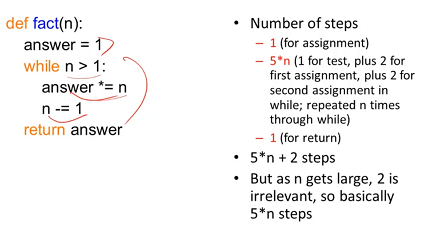

For the example above, we can formulate the following equation to compute its complexity: 1 + 5*n + 1.

In general, the multiplicative constant (number of computational steps inside a loop/iteration) doesn't matter when computing an algorithm's complexity. 

Instead, we focus on the term with the largest growth rate. That means for measuring complexity, we look at the case when problem/input size is growing to infinity (asymptotic complexity).

In the example above, the complexity is *n*. Which means that we are dealing with linear complexity in this example. The computation time increases linearly as the input size increases. In the BigO notation that is denoted as *O(n)*.

BigO notation tells you the number of operations within which an algorithm will execute for a specific problem/input size, and denotes the upper bound on its asymtotic growth (tells you how fast the number of computations grows).

BigO is a simplification since we ignore all other terms and focus only on the term with the biggest grow rate.

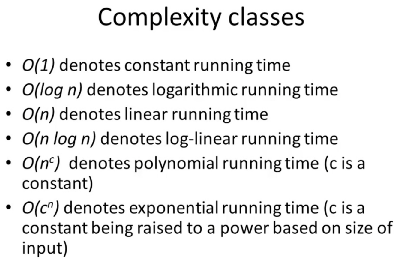

**Binary search - O(log n)**

Binary search is an algorithm whose input is a sorted (e.g., alphabetically) list. It returns either the index of the target item or null when an item is not contained in a list. Think about looking up a word in a dictionary.

In a binary search, you always try the middle number of the remaining number. For instance, when you want to guess a number in a list of 100 numbers in case the traget number is 57 would look like this: 50 (too low), 75 (too high), 63 (too high), 57 (correct).

In general, for any list of *n*, binary search will take log *n* steps to run in the worst case. That means, you have to check log n elements in the worst case.

For a list of 8 elements, log 8 == 3, because 23 == 8. So for a list of 8 numbers, you would have to check 3 numbers at most. For a list of 1,024 elements, log 1,024 = 10, because 210 == 1,024. So for a list of 1,024 numbers, you’d have to check 10 numbers at most.

In [ ]:
def search_iterative(list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    iteration = 1
    
    # While you haven't narrowed it down to one element ...
    while low <= high:
      print(f'Iteration #{iteration}')
      
      # ... check the middle element
      mid = (low + high) // 2
      guess = list[mid]
      
      # Found the item.
      if guess == item:
        return mid
      
      # The guess was too high.
      if guess > item:
        high = mid - 1 # update the upper bound of the list
      
      # The guess was too low.
      else:
        low = mid + 1 # update the lower bound of the list
      iteration += 1

    # Item doesn't exist
    return None

# define a list and item
list = [x for x in range(1,100,3)]
item = 20

search_iterative(list, item)

Iteration #1
Iteration #2
Iteration #3
Iteration #4
Iteration #5


**The growth rate illustrated: linear O(n) vs. log O(log n) complexity**

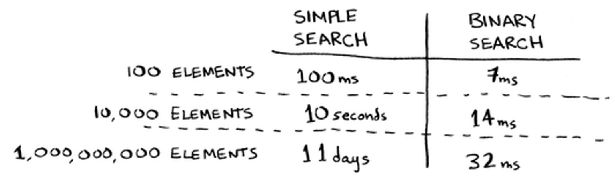

**Grow rates visualized**

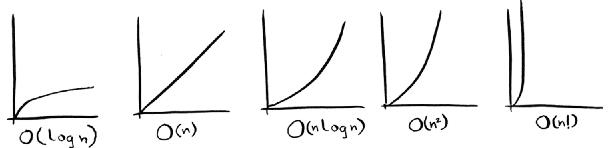

The above illustration might suggest that O(n log n) is not much better than O(n**2) - but it is!

Most common polynomial algorithms are of quadratic complexity (nested loop over the whole input size, i.e, x**2).

Exponential algorithms perform much worse than quadratic ones (e.g., compiling a string of digits into different groups as required when building a telephone grammar for IVR to get different pronounciations).

One of the slowest algorithms with O(n!) - *n factorial* - complexity is the traveling sales man. See https://towardsdev.com/illustration-of-np-hard-problem-traveling-salesman-problem-with-greedy-optimisation-b2a0ac9a0a25

**Tradeoff: sorting + binary search vs. linear search**

In case we are searching once, the costs of sorting a list and performing binary search on it are higher than doing only a linear search. Sorting in itself has already at least a liner time complexity.

However, if we want to perform many search queries, the trade off tips in the other direction. We need to implement an efficient sorting mechanism and take advantage of the binary search.

Additionally, we might improve our time complexity by optimizing our sorting algorithm.

In [ ]:
# Finds the smallest value in an array
def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  # inner loop
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index

# Sort array
def selectionSort(arr):
  newArr = []
  # outer loop
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr

print(selectionSort([5, 3, 6, 2, 10]))

[2, 3, 5, 6, 10]


Selection sort has *O(n\**2)* complexity since we have to loop through the first list, and then loop through the second list for each element of the first list.

Merge sort is an example of a recursive divide-and-conquer algorithm. It has *O(n log n)* complexity since we have to compare and copy each element of both lists. Each copy and comparison operation is constant with *O(1)*.

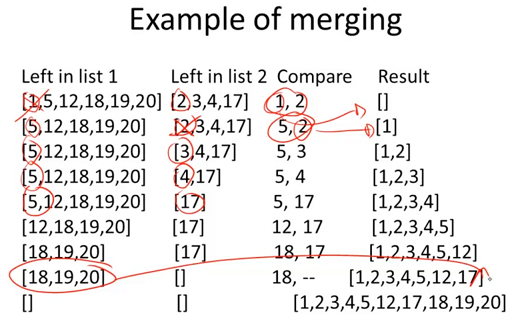

In [ ]:
def mergesort(x):
    if len(x) < 2:
        return x
    
    result = []
    # find the middle element of the array
    mid = int(len(x) / 2)
    
    # define lower part of the array
    y = mergesort(x[:mid])
    # define upper part of the array
    z = mergesort(x[mid:])
    i = 0
    j = 0
    
    # loop across both sub-arrays and compare their elements
    while i < len(y) and j < len(z):
      # append the smaller element to the sorted array
        if y[i] > z[j]:
            result.append(z[j])
            j += 1
        else:
            result.append(y[i])
            i += 1
    result += y[i:]
    result += z[j:]
    return result

**Merge sort vs. quick sort: average vs. worst case complexity**

For quick sort, we define the base case: arrays of length 0 and 1 don't need any sorting and can be returned right away. For langer arrays, we chose the first element as a pivot and partition the remaining array into items which are smaller or larger than the pivot value.

We continue to apply quicksort recursively to the partitioned arrays and combine the results. We can prove that the algorithm works by formulating an inductive proof. Each inductive proof has two steps: the base case and the inductive case.

In [ ]:
def quicksort(array):
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    return quicksort(less) + [pivot] + quicksort(greater)

print(quicksort([10, 5, 2, 3]))



[2, 3, 5, 10]


Quicksort is unique because its speed depends on the pivot. While merge sort always performs with *O(n log n)* complexity, quick sort does so only on average and may reach *O(n\**2)* in the worst case.

Choosing the first element of the array could result in a very long call stack in case the sub-array end up being already sorted:

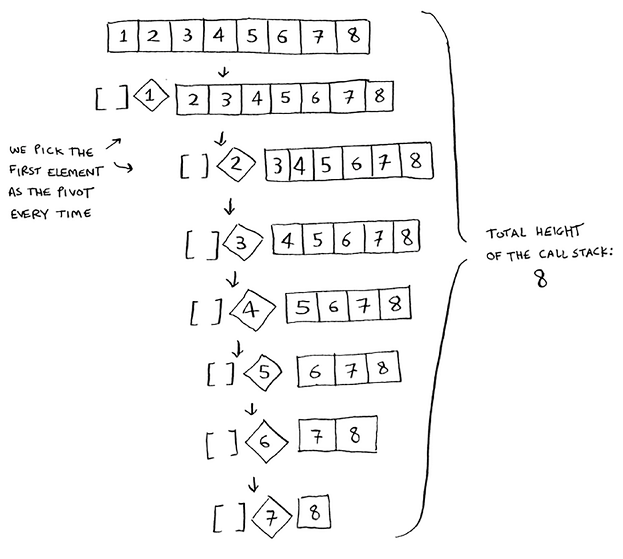

By deviding the array in half during each recursion step, the call stack gets much shorter:

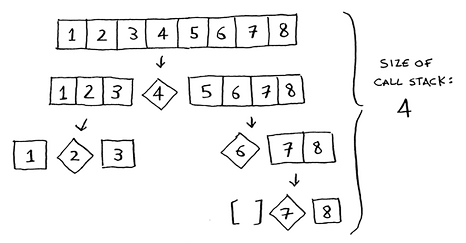

In the first case, the height of the stack is *O(n) *and only *O(log n)* in the second case.

On each level of the stack you nead to touch each element once for compiling the pivot, the left, and the right sub-array which has an additional complexity of *O(n)*. That is in the worst case the complexity can reach *O(n\**2)*.

If we always choose a random element in the array as the pivot, quick sort will complete in *O(a log n)* time on average.

# PART II - Data Structures and data-structure-specific algorithms

In the last part, we have seen that the call stack is a structure which organizes the data (variable names and corresponding values) in a specific form. The size of the call stack can have an influence on the time complexity of an algorithm. In this part we look at other different data structures.

**Arrays vs. linked lists**

When creating a variable, it gets assigned to a memory slot with a specific address. In case you want to create variables that hold more than a single object, you have to create arrays or linked lists.

Arrays have a fixed number of slots that have to occupy contiguos (all slots are next to each other) memory slots. With linked list, on the other hand, items can be store anywhere in memory. Those addresses are then linked in memory.

The disadvantage with arrays is that if there are no required number of contigous memory slots available, it's not possible to create an array. However, you can access each element of an array directly since you know all of used memory addresses.

With linked lists, if you want to access its last element, you have to traverse the whole list since you get the memory address of an item only by accessing the previous one. That is, for direct access and excessive "jumping around" linked lists are too slow.





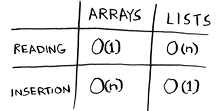

An insertion (and by that matter also a deletion) in linked lists is as easy as changing what the previoud element of the list points to.

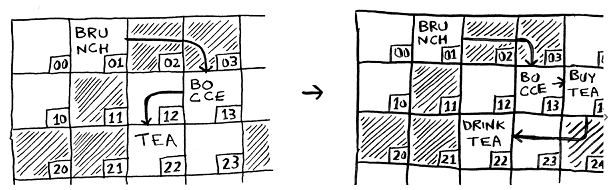

But for arrays, you first have to shift all of the other elements to the side before inserting a new one. But if there is no space, you have to copy everything over to a new location.

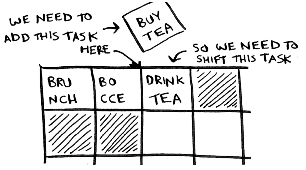

Depending on the goal, we may prefer specific data structures to implement the most effective solution.

Python lists are dynamic arrays which combines best of two worlds (see https://stackoverflow.com/questions/3917574/how-is-pythons-list-implemented).

**Hash tables**

This is a look up table containing keys which map to values. This allows to have a *O(1)* (constant) search time complexity.

Under the hood, we differentiate between a hash function, which maps keys to array indexes. And an array which contains the values. A hash function has to be consistent and have an one-to-one key-index mapping. 

Hash tables are also called (hash) maps, dictionaries, and associative arrays. In Python hash tables are implemented as dicts.

Besides relationships modelling, hashes are useful for quick filtering out/prevention of duplicates and data caching (e.g., with web servers).

In [ ]:
book = {"apple": 0.67, "milk": 1.49, "avocado": 1.49}
print(book)

for key, value in book.items():
  print(f'{key} costs ${value}')

To understand what influences hash tables' performance, we need to understand *collisions*. A collison happens when two keys get assigned to the same slot of the underlying array.

A general workaround for collisions is to start a linked list at the slot where a collision occures. However, hash tables performance will degrade in case all keys happen to be stored at the same slot. Essentially, instead of a hash table, we are dealing with a linked list. 

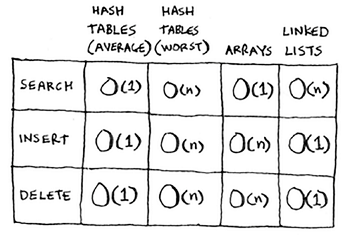

Hash tables are on average as fast as arrays at searching and they are as fast as linked lists at insertung and deleting. But in the worst case, hash tables perform worse than arrays and linked lists.

Therefore, it is important to efficiently distribute all keys evenly across all available slots, i.e. to keep the load factor as low as possible.

When the load factor gets greater than 0.7, it's time to resize that hash table (allocate more slots).

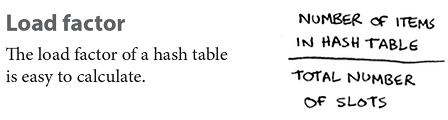

**Graphs and breadth-first search**

Graphs and breadth-first search are useful to solve a *shortest-path* problem. For instance:

- an algorithm which can calculate the shortest path to victory in a checkers game
- a spell checker which can calculate the fewest number of edits from the unknown (misspelled) word to an existing one
- navigation algorithm which can find the shortest route to a destination

First, the problem is modeled as a graph containing *nodes* and corresponding connections (*edges*):

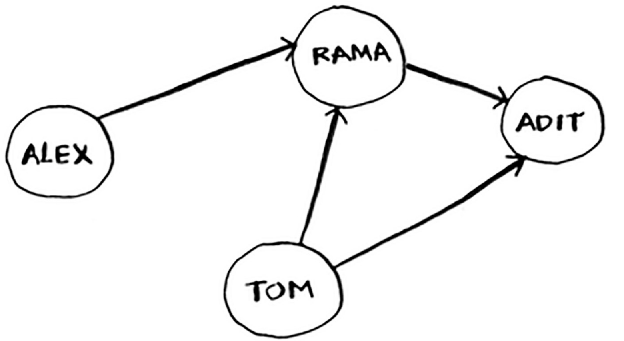

A node can be connected to several other nodes. Two interconnected nodes are called *neighbors*.

The above graph is a *directed* graph. For instance, Tom's node is connected to Adit and Rama, but not the other way around. But graphs can also be undirected where if one node is connected to another, it establishes a reciproke relation.

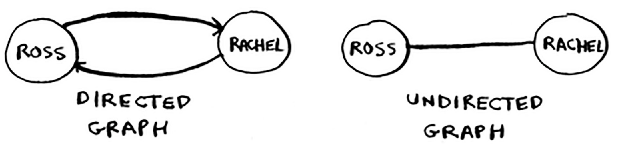

We can implement a node as an entry of a hash table with the key being the node name, and the values being its neighbors. Since hash tables have to internal ordering, it doesn't matter what order key/value pairs are added in.

In [ ]:
graph = {}
graph['node_A'] = ['node_B', 'node_C', 'node_D']

Breadth-first search is able to answer two questions:
1. Is there a path from node A to node B?
2. What is the shortest path from node A to node B?

We can implement this algorithm by creating a *queue* in which each element is checked for a certain parameter. Queues are a first-in-first-out (FIFO) data structures:

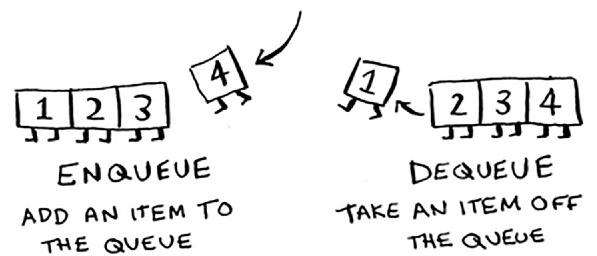

Assume we have the following graph of your social network and what to find out whether somebody of them is selling mangos:

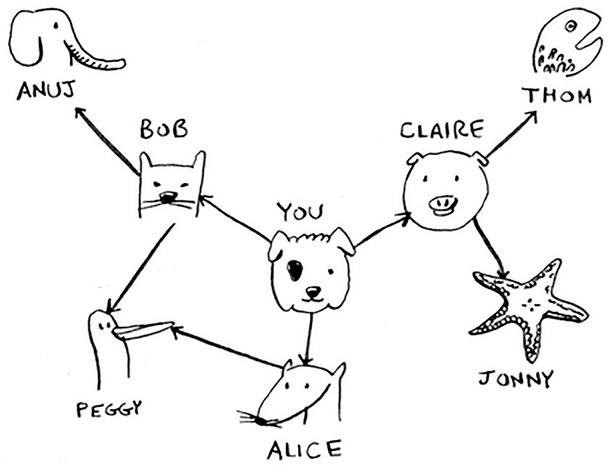

This is how the implementation would look like:

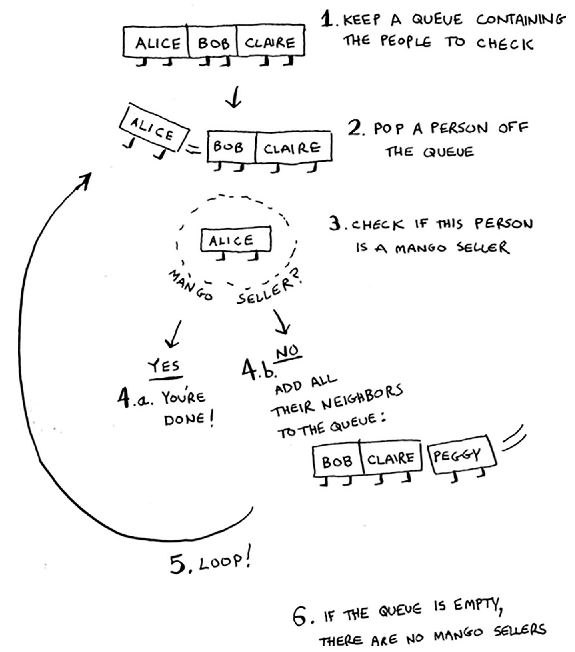

In [ ]:
from collections import deque

# if a person's name ends with m they're a seller
def person_is_seller(name):
      return name[-1] == 'm'

# constructing a graph
graph = {}
graph["you"] = ["alice", "bob", "claire"]
graph["bob"] = ["anuj", "peggy"]
graph["alice"] = ["peggy"]
graph["claire"] = ["thom", "jonny"]
graph["anuj"] = []
graph["peggy"] = []
graph["thom"] = []
graph["jonny"] = []

# implementing the breadth-first search
def search(name):
    search_queue = deque()
    search_queue += graph[name]
    # keep track of which people you've searched before using a set (doesn't allow dublicates)
    searched = set()
    while search_queue: # as long as there are elements in the queue
        person = search_queue.popleft() # take the first element in the queue
        
        # check if person is in the searched set
        if person not in searched:
            # check if person's name ends with an m
            if person_is_seller(person):
                print(person + " is a mango seller!")
                return True
            else:
                # if person not a mango seller, add all her graph neighbors to the queue
                search_queue += graph[person]
                # add the person to searched set
                searched.add(person)
    return False

# test the search function
search("you")

thom is a mango seller!


True

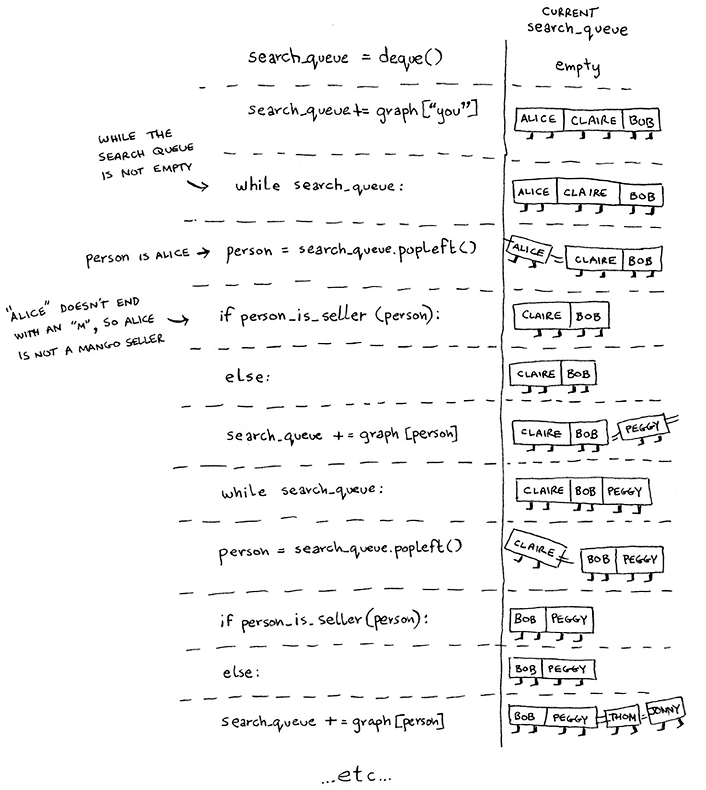

When searching the entire network for a specific node (worst case), we have to follow each edge and add all nodes to the queue, so the running time is O(number of nodes + number of edges). This is also written as *O(V+E)* where V stands for vertices.

**Trees**

Trees are a special type of a graph where no edges ever point back:


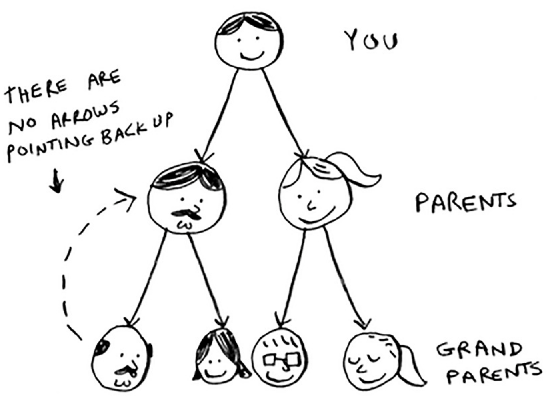

Trees are convienient to store hierarchical data and data that is linearlly ordered (less than, bigger than relations). All problems that can be formulated as a decision problem, can be nicely modeled by trees.

As with graphs, we have nodes and edges (also called *branches* in the context of trees). Nodes which don't have a child nodes are called *leaves*. We always have a *root node* in a tree.

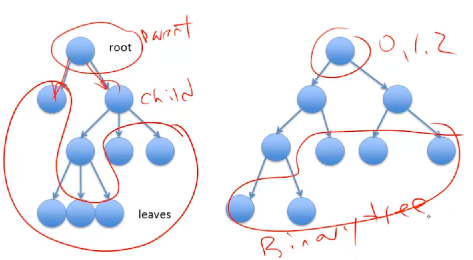

We can search a tree with *breadth-first search* or a *depth-firt search*:

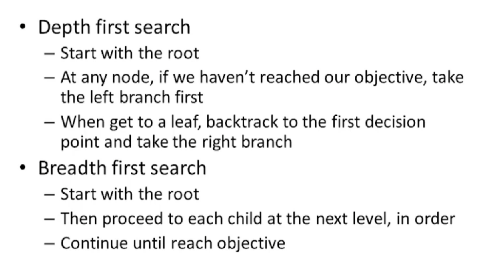

In contrast to breadth-first search, depth-first search is implemented not via a queue, but a stack, which is a last-in-first-out (LIFO) data structure.

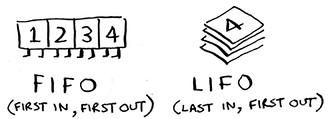

This is the only implementation change between breadth- and depth-first search. Compare to the breadth-first search code above. For more details on implementation of queues and stacks in Python see https://realpython.com/python-deque/

**Weighted graphs and Dijkstra’s algorithm**

Instead of asking what is the shortest paths from node A and node B, we can also ask ourselves what is the fastest path. To answer this question we can use *Dijkstra’s algorithm*. The algorithm works with the *weights* associated with each edge of the graph. Such graphs are called *weighted* graphs:



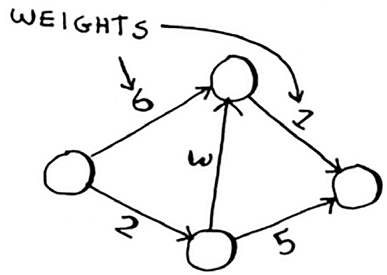

Dijkstra’s algorithm works only on *directed acyclic graphs* (no loops are allowed within a graph) and can't work with negative weights (for that see *Bellman-Ford* algorithm). Here are the neccessary steps of the Dijkstra’s algorithm:

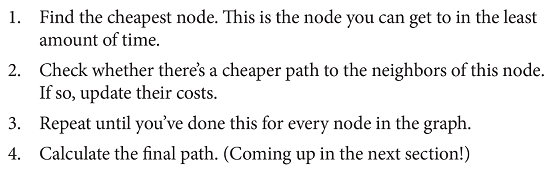

To implement the algorithm on the example graph pictured above, we need three hash tables:

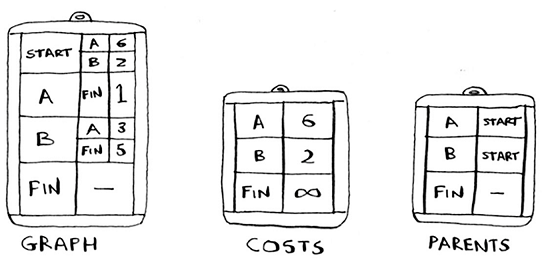

In [ ]:
# constructing the graph
graph = {}
graph["start"] = {} # each node is assigned another hash table
graph["start"]["a"] = 6 # which contais all neighbor nodes of the node as keys
graph["start"]["b"] = 2 # and associated weights as values

graph["a"] = {}
graph["a"]["fin"] = 1

graph["b"] = {}
graph["b"]["a"] = 3
graph["b"]["fin"] = 5

graph["fin"] = {}

# the costs table which stores all current costs of each node
infinity = float("inf")
costs = {}
costs["a"] = 6
costs["b"] = 2
costs["fin"] = infinity

# the parents table which lists all parent nodes of each node
parents = {}
parents["a"] = "start"
parents["b"] = "start"
parents["fin"] = None

processed = []

def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    
    # loop through each node and check its cost
    for node in costs:
        cost = costs[node]
        
        # If it's the lowest cost so far and hasn't been processed yet...
        if cost < lowest_cost and node not in processed:
            # ... set it as the new lowest-cost node.
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

# Find the lowest-cost node that you haven't processed yet.
node = find_lowest_cost_node(costs)

# If you've processed all the nodes, this while loop is done.
while node is not None:
    cost = costs[node]
    # Go through all the neighbors of this node.
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        # If it's cheaper to get to this neighbor by going through this node...
        if costs[n] > new_cost:
            # ... update the cost for this node.
            costs[n] = new_cost
            # This node becomes the new parent for this neighbor.
            parents[n] = node
    # Mark the node as processed.
    processed.append(node)
    # Find the next node to process, and loop.
    node = find_lowest_cost_node(costs)

print("Cost from the start to each node:")
print(costs)

**Heaps**

A heap refers sometimes to an area of memory used for run-time memory allocation. However, a heap is also a data structure that is conceptually a *complete binary tree* Heaps are used for implementing priority queues, the heapsort algorithm, and some graph algorithms.

Heaps maintain an ordering of the items within the tree where every paranet node has equal or bigger value than it's child nodes:


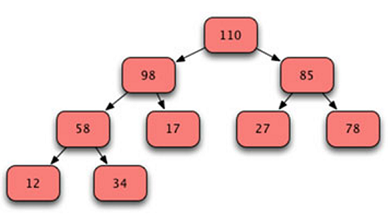

It's possible to add a value to a heap (on the bottom) or delete, and retrieve, the maximum value from a heap (which is always on the top of a heap).

Using both operations, we can formulate a sorting algorithm by building a heap with a list of values and then removing values one by one in descending order.

# PART III - Advanced topics

**Greedy algorithms and approximation**

Greedy algorithms are in a sense *easy*: at each step, you have to pick the locally optimal solution. This also should ensure deriving the globally optimal solution. See the following example where you want to schedule as many as possible classes in a classroom: 

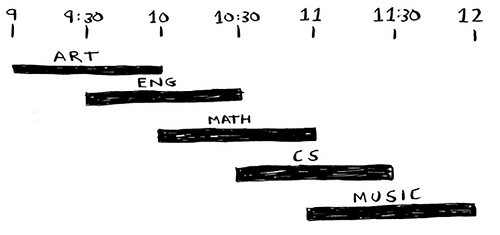

Not all classes can take place in this classroom due to their overlap. However, we can formulate a greedy algorithm to solve the problem:

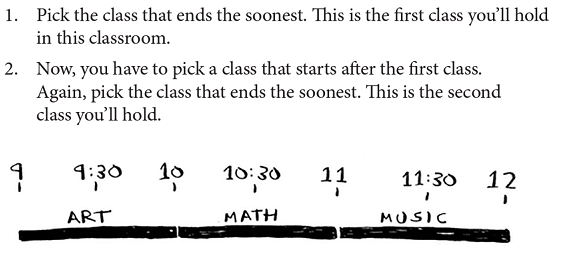

However, greedy algorithms don't work for all problems. For instance, in a knapsack problem, you try to maximaze the overall value of the things you put into the knapsack. However, you are at the same time limited by the weight of each object. Assume that your knapsack can hold only 4 pounds. What would be the most valueable combination from the following three things?

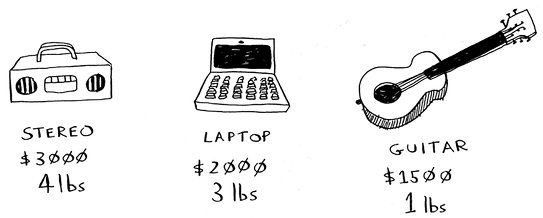

If you would pick the most valueable object first (like a greedy algorithm), the knapsack couldn't hold any additional objects. However, by taking the laptop and the guitar, you would achieve a overall higher value (\$2000 + \$1500) and both objects would still fit into the knapsack.

A greedy algorithm would run with a *O(n log n)* and wouldn't find an optimal solution for the knapsack problem.

However, it might be still a "good enough" solution, and is easy to write. This comes in-handy when an exact solution is not feasible from practical standpoint (since the exact calculation would take too long or wouldn't ever finish). For instance, the travelling sales-person (NP-complete problem).

Such algorithms are called *approximation algorithms*. An approximation algorithm is evaluated by how fast it is and how closely it can approximate the solution. Once you realize that a problem is NP-complete (not obvious), there is no need to come up with an exact solution.

Here are some hints that a problem might be NP-complete:



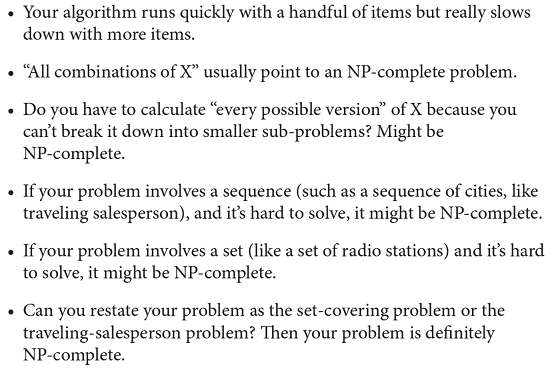

**Guess and check algorithms**

Another form of approximation algorithms are *guess and check* (or trial and error) algorithms where we iterate through potential solutions and check how well it approximates the exact solution. For an example see https://www.geeksforgeeks.org/find-root-of-a-number-using-newtons-method/

In [ ]:
def squareRoot(n, l) :
 
    # Assuming the sqrt of n as n only
    x = n
 
    # To count the number of iterations
    count = 0
 
    while (1) :
        count += 1
 
        # Calculate more closed x
        root = 0.5 * (x + (n / x))
 
        # Check for closeness
        if (abs(root - x) < l) :
            break
 
        # Update root
        x = root
 
    return root, count

print(squareRoot(327, 0.01))

(18.083141320042877, 8)


**Dynamic programming**

Dynamic programming (DP) allows to derive at an exact solution for problems where the amount of possible solution combinations or guesses is impractically high (which leads to a very long computation times).

DP can be applied if a problem has *optimal substructure* which means that a globally optimal solution can be found by combining optimal solutions to local subproblems. In other words, solutions of subproblems are building up to the overall solution.

The subproblems have to *overlap* which means that the same problem can be solved multiple times. For instance, this is not applicable to merge sort since we have to merge different lists at different steps.


One example for the application of DP is the *Fibonacci sequence*. Eventhough the recursive implementation from above works, it is very slow. It will run "forever" with 120.

The approximate complexity of Fibonacci is *O(fib(n))* which for fib(120) amounts to 8,670,007,398,507,948,658,051,921. If each recursive call would take a nonosecond, fib(120) would take about 250k years to complete.

In [ ]:
def fib(n):
  """Assumes n is an int >= 0
  Returns Fibonacci of n"""
  
  if n == 0 or n == 1:
    return 1
  else:
    return fib(n-1) + fib(n-2)

fib(120)

Looking at how fib() gets called, we can see that some steps are computed over and over - e.g., fib(3) - and cause additional calls. The obvious solution is to store the answers to those dublicate calls instead of computing the same value several times.

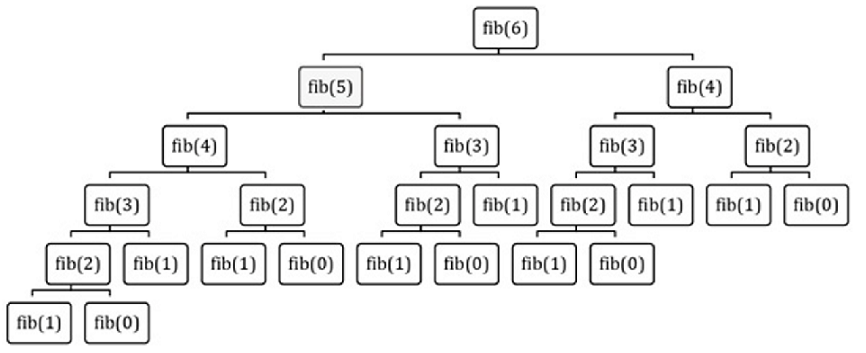

There are two general approaches to DP:

- *Memoization* solves the original problem top-down; starts at the original problem and breaks it down into sub-problems; stores all answers into a table
- *Tabular* is a bottom-up method which starts from the smallest problem and stores the answers in a table; then all solution are combined to solve the next bigger problem

In [ ]:
# Fibonacci with memoization
def fib_memo(n, memo = None):
  if memo == None:
    memo = {}
  
  if n == 0 or n == 1:
    return 1
  
  try:
    return memo[n]
  except KeyError:
    result = fib_memo(n-1, memo) + fib_memo(n-2, memo)
    memo[n] = result
    return result

fib_memo(120)

8670007398507948658051921

In [ ]:
# Fibonacci with tabular
def fib_tab(n):
  tab = [1]*(n+1) # constructing the table (a list in that case)

  # looping through the table
  for i in range(2, n+1):
    # for each value n, summing the two privious values and storing in the table 
    tab[i] = tab[i-1] + tab[i-2]
  return tab[n] # returning the sum for n

fib_tab(120)

8670007398507948658051921

In both cases the complexity is reduced to *O(n)*.

If solving the original problem requires solving all sub-problems, it's usually better to use the tabular approach. Tabular is easier to program and doesn't add the overhead of recursive calls and can pre-allocate a table of the appropriate size instead of growing it with each call.

Memoization is more efficient if only some of the subproblems need to be solved.

The knapsack problem from above exhibits both of the required propperties (optimal substructure and overlapping subproblems) for DP.. We first calculate the otimal value for 1, 2, 3, and 4 pound knapsacks (subproblems):

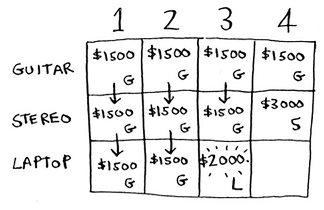

And solve the initial problem (What is the maximum value of objects that can fit into 4 pound knapsack?) by combining solutions to smaller subproblems:

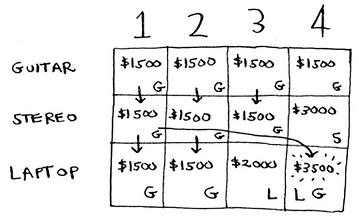

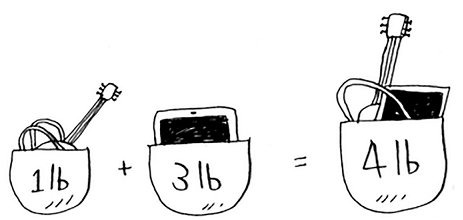

In case there is an additional fourth item available, you don't need to recalculate everything from scratch. Just add a new row for the fourth object. The iPhone weights 1 pound and is \$2000 worth.

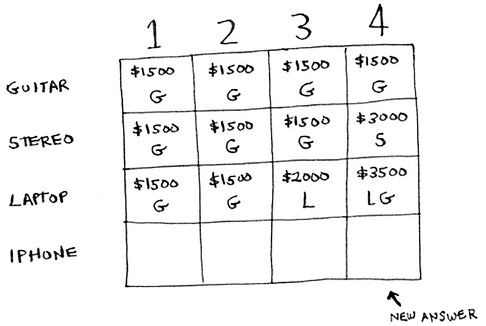

- changing the order of the rows doesn't affect the outcome
- filling out the grid column-wise doesn't affect the outcome in this example, but might in others examples
- when adding smaller items (sub-problems) we need to account for that granularity within the grid structure 

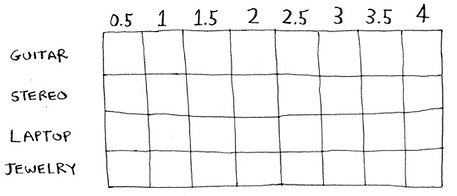

Dynamic programming can be applied only to descrete problems. So, you can't put partial items in your knapsack or make cost of an item dependent on an other item. It is also possible that the best solution doesn't fill the whole knapsack.

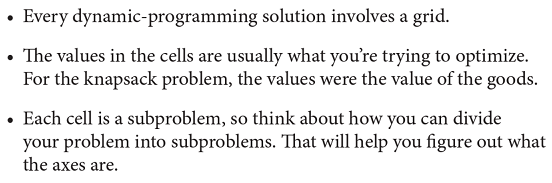

# PART IV - Problem solving

In programming, we can define *problem solving* as writing an original program to accomplish a certain task. Additionally, problems include constraints (unbreakable rules) about the way a problem can be solved.

In the context of programming problems, we deal with memory, time complexity or implementation constraints.

In other words, solving a computational problem involes two parts:
1. writing a program
2. that meets the contraints 

Sometimes it's easy to oversse presence or absence of specific constraints. But if you are aware of all possible actions (operations) you can take to solve a problem, you are unable to do so.

By enumerating all possible operations and testing every combination of operations, we can find a sequence of operations (algorithm) that solves the posed task.

To do so, we have first to state the problem formally as a list of possible operations. We should formulate the operations in more generic terms.

When analyzing a problem, it's useful to look at its most constrained parts first. It means that in a problem where you are trying to assign different values to different variables to meet constraints, you should start with the variable that has the most constraints, or the variable that has the lowest number of possible values. 

Another difficulty arises when a solution requires a *long sequence* of operations. In that case it's difficult to evaluate whether a specific operation is making a progress towards the final goal.

For such cases, we need an objective measure of progress. This is easier when we try to reduce the original problem.

Here's the systematic strategy we'll apply for solving problems:

1. State the **problem** clearly. Identify the **input** & **output** formats. Use abstractions like *objects* and specific *data structures*.
2. Come up with some **example inputs & outputs**. Try to cover all **edge cases**.
3. Come up with a **correct solution** for the problem. State it in plain English.
4. **Implement the solution and test it** using example inputs. Fix bugs, if any.
5. **Analyze the algorithm's complexity** and identify inefficiencies, if any.
6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

